In [2]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re

df=pd.read_csv('./서울시지역구_쓰레기배출순위.csv',encoding='utf-8')
df1=pd.read_csv('./서울시자치구_유흥인구.csv',encoding='utf-8')

In [22]:
df

,Unnamed: 0,자치구,배출량(C),처리방법.3
0,1,합계,"47,995.8","42,235.6"
1,26,강동구,"4,555.5","4,356.1"
2,23,서초구,"3,801.7","3,566.8"
3,24,강남구,"3,718.0","3,059.5"
4,17,강서구,"2,949.5","2,213.8"
5,20,영등포구,"2,556.1","2,377.5"
6,25,송파구,"2,353.1","2,041.2"
7,13,은평구,"2,311.2","2,146.4"
8,5,성동구,"2,181.2","1,442.1"
9,15,마포구,"1,979.4","1,753.4"


In [23]:
df=df.drop(index=0, axis=0)
#df=df.dropna(axis=0)

In [55]:
type(df['배출량(C)'])

pandas.core.series.Series

In [28]:
df1

,signgu_nm,cnsmr_popltn_co
0,서초구,1431.168246
1,강남구,1303.786779
2,관악구,921.642378
3,종로구,839.219076
4,강서구,734.316692
5,송파구,636.907335
6,영등포구,621.921280
7,강북구,532.004950
8,강동구,509.525868
9,은평구,269.748989


In [24]:
df

,Unnamed: 0,자치구,배출량(C),처리방법.3
1,26,강동구,"4,555.5","4,356.1"
2,23,서초구,"3,801.7","3,566.8"
3,24,강남구,"3,718.0","3,059.5"
4,17,강서구,"2,949.5","2,213.8"
5,20,영등포구,"2,556.1","2,377.5"
6,25,송파구,"2,353.1","2,041.2"
7,13,은평구,"2,311.2","2,146.4"
8,5,성동구,"2,181.2","1,442.1"
9,15,마포구,"1,979.4","1,753.4"
10,19,금천구,"1,936.9","1,798.5"


In [26]:
df = df.reset_index(drop=True)
df

,Unnamed: 0,자치구,배출량(C),처리방법.3
0,26,강동구,"4,555.5","4,356.1"
1,23,서초구,"3,801.7","3,566.8"
2,24,강남구,"3,718.0","3,059.5"
3,17,강서구,"2,949.5","2,213.8"
4,20,영등포구,"2,556.1","2,377.5"
5,25,송파구,"2,353.1","2,041.2"
6,13,은평구,"2,311.2","2,146.4"
7,5,성동구,"2,181.2","1,442.1"
8,15,마포구,"1,979.4","1,753.4"
9,19,금천구,"1,936.9","1,798.5"


In [30]:
a=pd.concat([df,df1],axis=1)
#df

In [11]:
#df=df.drop(index=0, axis=0)
df=df.dropna(axis=0)

In [13]:
df

,Unnamed: 0,자치구,배출량(C),처리방법.3
1,26,강동구,"4,555.5","4,356.1"
2,23,서초구,"3,801.7","3,566.8"
3,24,강남구,"3,718.0","3,059.5"
4,17,강서구,"2,949.5","2,213.8"
5,20,영등포구,"2,556.1","2,377.5"
6,25,송파구,"2,353.1","2,041.2"
7,13,은평구,"2,311.2","2,146.4"
8,5,성동구,"2,181.2","1,442.1"
9,15,마포구,"1,979.4","1,753.4"
10,19,금천구,"1,936.9","1,798.5"


In [15]:
a=pd.concat([df,df1],axis=1)
df=a.dropna(axis=0)

In [31]:
a.to_csv('유흥인구-쓰레기배출순위.csv')

In [32]:
a

,Unnamed: 0,자치구,배출량(C),처리방법.3,signgu_nm,cnsmr_popltn_co
0,26,강동구,"4,555.5","4,356.1",서초구,1431.168246
1,23,서초구,"3,801.7","3,566.8",강남구,1303.786779
2,24,강남구,"3,718.0","3,059.5",관악구,921.642378
3,17,강서구,"2,949.5","2,213.8",종로구,839.219076
4,20,영등포구,"2,556.1","2,377.5",강서구,734.316692
5,25,송파구,"2,353.1","2,041.2",송파구,636.907335
6,13,은평구,"2,311.2","2,146.4",영등포구,621.921280
7,5,성동구,"2,181.2","1,442.1",강북구,532.004950
8,15,마포구,"1,979.4","1,753.4",강동구,509.525868
9,19,금천구,"1,936.9","1,798.5",은평구,269.748989


In [45]:
a.replace(',', '')

,Unnamed: 0,자치구,배출량(C),처리방법.3,signgu_nm,cnsmr_popltn_co
0,26,강동구,"4,555.5","4,356.1",서초구,1431.168246
1,23,서초구,"3,801.7","3,566.8",강남구,1303.786779
2,24,강남구,"3,718.0","3,059.5",관악구,921.642378
3,17,강서구,"2,949.5","2,213.8",종로구,839.219076
4,20,영등포구,"2,556.1","2,377.5",강서구,734.316692
5,25,송파구,"2,353.1","2,041.2",송파구,636.907335
6,13,은평구,"2,311.2","2,146.4",영등포구,621.921280
7,5,성동구,"2,181.2","1,442.1",강북구,532.004950
8,15,마포구,"1,979.4","1,753.4",강동구,509.525868
9,19,금천구,"1,936.9","1,798.5",은평구,269.748989


In [56]:
df2=pd.read_csv('./서울시_대중교통1일이용객수.csv',encoding='utf-8')

In [57]:
df2

,Unnamed: 0,자치구,대중교통1일이용객수,구별인구수
0,21,서초구,388991,435107
1,22,강남구,388965,550209
2,20,관악구,362357,517334
3,1,중구,327000,136488
4,23,송파구,321916,682741
5,13,마포구,320325,385925
6,18,영등포구,286963,400986
7,0,종로구,283986,161869
8,16,구로구,241704,439371
9,7,성북구,234382,454744


In [66]:
b=pd.concat([df,df2],axis=1)

In [67]:
b.to_csv('쓰레기배출량-유동인구.csv')

In [39]:
df3=pd.read_csv('./서울시유흥소비인구.csv',encoding='UTF-8')

In [40]:
df3

,Unnamed: 0,gov_dn_cd,bntr_nm,signgu_nm,adstrd_nm,de,sex_se,year_se,cnsmr_popltn_co
0,0,1111053000,서울특별시,종로구,사직동,20200804,X,xx,29.972110
1,1,1111053000,서울특별시,종로구,사직동,20200807,M,50,22.479082
2,2,1111053000,서울특별시,종로구,사직동,20200807,X,xx,22.479082
3,3,1111053000,서울특별시,종로구,사직동,20200808,X,xx,22.479082
4,4,1111053000,서울특별시,종로구,사직동,20200811,M,60,22.479082
...,...,...,...,...,...,...,...,...,...
7085,7085,1174068500,서울특별시,강동구,길동,20201031,M,25,29.972110
7086,7086,1174068500,서울특별시,강동구,길동,20201031,M,40,37.465137
7087,7087,1174068500,서울특별시,강동구,길동,20201031,M,50,22.479082
7088,7088,1174068500,서울특별시,강동구,길동,20201031,M,60,22.479082


In [41]:
df3=df3[df3['signgu_nm']=='서초구']

In [42]:
df3

,Unnamed: 0,gov_dn_cd,bntr_nm,signgu_nm,adstrd_nm,de,sex_se,year_se,cnsmr_popltn_co
4800,4800,1165051000,서울특별시,서초구,서초1동,20200804,X,xx,22.479082
4801,4801,1165051000,서울특별시,서초구,서초1동,20200806,M,25,22.479082
4802,4802,1165051000,서울특별시,서초구,서초1동,20200812,M,25,22.479082
4803,4803,1165051000,서울특별시,서초구,서초1동,20200812,X,xx,29.972110
4804,4804,1165051000,서울특별시,서초구,서초1동,20200815,M,30,29.972110
...,...,...,...,...,...,...,...,...,...
5190,5190,1165054000,서울특별시,서초구,잠원동,20201018,M,30,22.479082
5191,5191,1165054000,서울특별시,서초구,잠원동,20201020,X,xx,29.972110
5192,5192,1165054000,서울특별시,서초구,잠원동,20201025,M,20,29.972110
5193,5193,1165054000,서울특별시,서초구,잠원동,20201025,M,25,22.479082


In [43]:
df3=df3.drop(columns=['sex_se', 'year_se','gov_dn_cd','bntr_nm','de'], axis=1)

In [44]:
df3

,Unnamed: 0,signgu_nm,adstrd_nm,cnsmr_popltn_co
4800,4800,서초구,서초1동,22.479082
4801,4801,서초구,서초1동,22.479082
4802,4802,서초구,서초1동,22.479082
4803,4803,서초구,서초1동,29.972110
4804,4804,서초구,서초1동,29.972110
...,...,...,...,...
5190,5190,서초구,잠원동,22.479082
5191,5191,서초구,잠원동,29.972110
5192,5192,서초구,잠원동,29.972110
5193,5193,서초구,잠원동,22.479082


In [45]:
g=df3.groupby('adstrd_nm').sum()

In [46]:
g=g.drop(columns=['Unnamed: 0'],axis=1)

In [47]:
g

,cnsmr_popltn_co
adstrd_nm,
서초1동,284.735044
서초2동,247.269906
서초3동,1078.995955
서초4동,34325.558817
잠원동,352.172291


In [25]:
df4=pd.read_csv('./LOCAL_PEOPLE_DONG_202110.csv')
#df4

In [27]:
df4=df4.reset_index()

In [28]:
df4

,index,Unnamed: 0,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20211001,0,11500550,14235.2719,677.9083,307.5833,302.4226,340.4496,512.9114,526.7665,...,511.1651,619.6140,608.3882,658.8701,460.4023,548.1657,571.3773,442.0823,1020.2156,NaN
1,20211001,0,11650580,19030.2106,835.5190,616.6510,726.6034,468.8152,415.6875,432.9448,...,457.2903,770.4217,962.1563,1200.6410,743.1393,587.3082,517.9607,409.1231,1243.8078,NaN
2,20211001,0,11560650,15500.9823,495.4932,232.5452,345.5708,348.8626,604.8602,608.3597,...,664.0441,598.1471,525.5730,645.8569,589.3231,833.4194,643.0477,449.3879,1046.4871,NaN
3,20211001,0,11140570,7338.3524,179.1488,59.7162,246.3065,419.2554,412.5466,375.7084,...,305.1289,272.2215,191.8767,185.8954,183.6736,166.3003,201.4220,94.7262,385.0645,NaN
4,20211001,0,11200560,16180.9931,347.0175,199.4538,306.5052,591.6085,697.1087,665.0602,...,807.3914,947.1588,671.7726,651.7558,515.6408,616.6335,487.2112,320.8738,925.3486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20211031,23,11650600,17478.4904,714.1254,299.4715,453.6923,493.4247,574.7405,606.6867,...,766.5846,897.7361,740.0324,746.0500,635.1522,612.5224,614.9323,512.0810,1090.7791,NaN
315452,20211031,23,11500615,32460.6023,1837.3040,1071.3764,1092.1734,741.0566,1040.5055,961.6468,...,1100.7893,1327.8705,1578.7395,1590.2784,1020.4864,1061.3069,915.4145,804.8437,1750.1258,NaN
315453,20211031,23,11500550,13687.5952,678.8032,307.9898,296.3808,320.4280,456.3872,514.8138,...,469.5416,590.1995,595.4880,632.0972,435.8399,502.1215,531.8227,408.1603,1020.4507,NaN
315454,20211031,23,11170685,25708.8859,627.0877,269.1795,381.0943,784.8365,1166.8808,1359.7283,...,1510.6559,1732.9463,1111.6756,1070.1019,819.6220,835.5903,739.6944,531.0385,1472.6105,NaN


In [8]:
#df4[df4['signgu_nm']=='서초구']
df4['행정동코드']

0         14235.2719
1         19030.2106
2         15500.9823
3          7338.3524
4         16180.9931
             ...    
315451    17478.4904
315452    32460.6023
315453    13687.5952
315454    25708.8859
315455    19975.0783
Name: 행정동코드, Length: 315456, dtype: float64

In [29]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [48]:
g

,cnsmr_popltn_co
adstrd_nm,
서초1동,284.735044
서초2동,247.269906
서초3동,1078.995955
서초4동,34325.558817
잠원동,352.172291


Figure(2160x1440)
AxesSubplot(0.125,0.125;0.775x0.755)


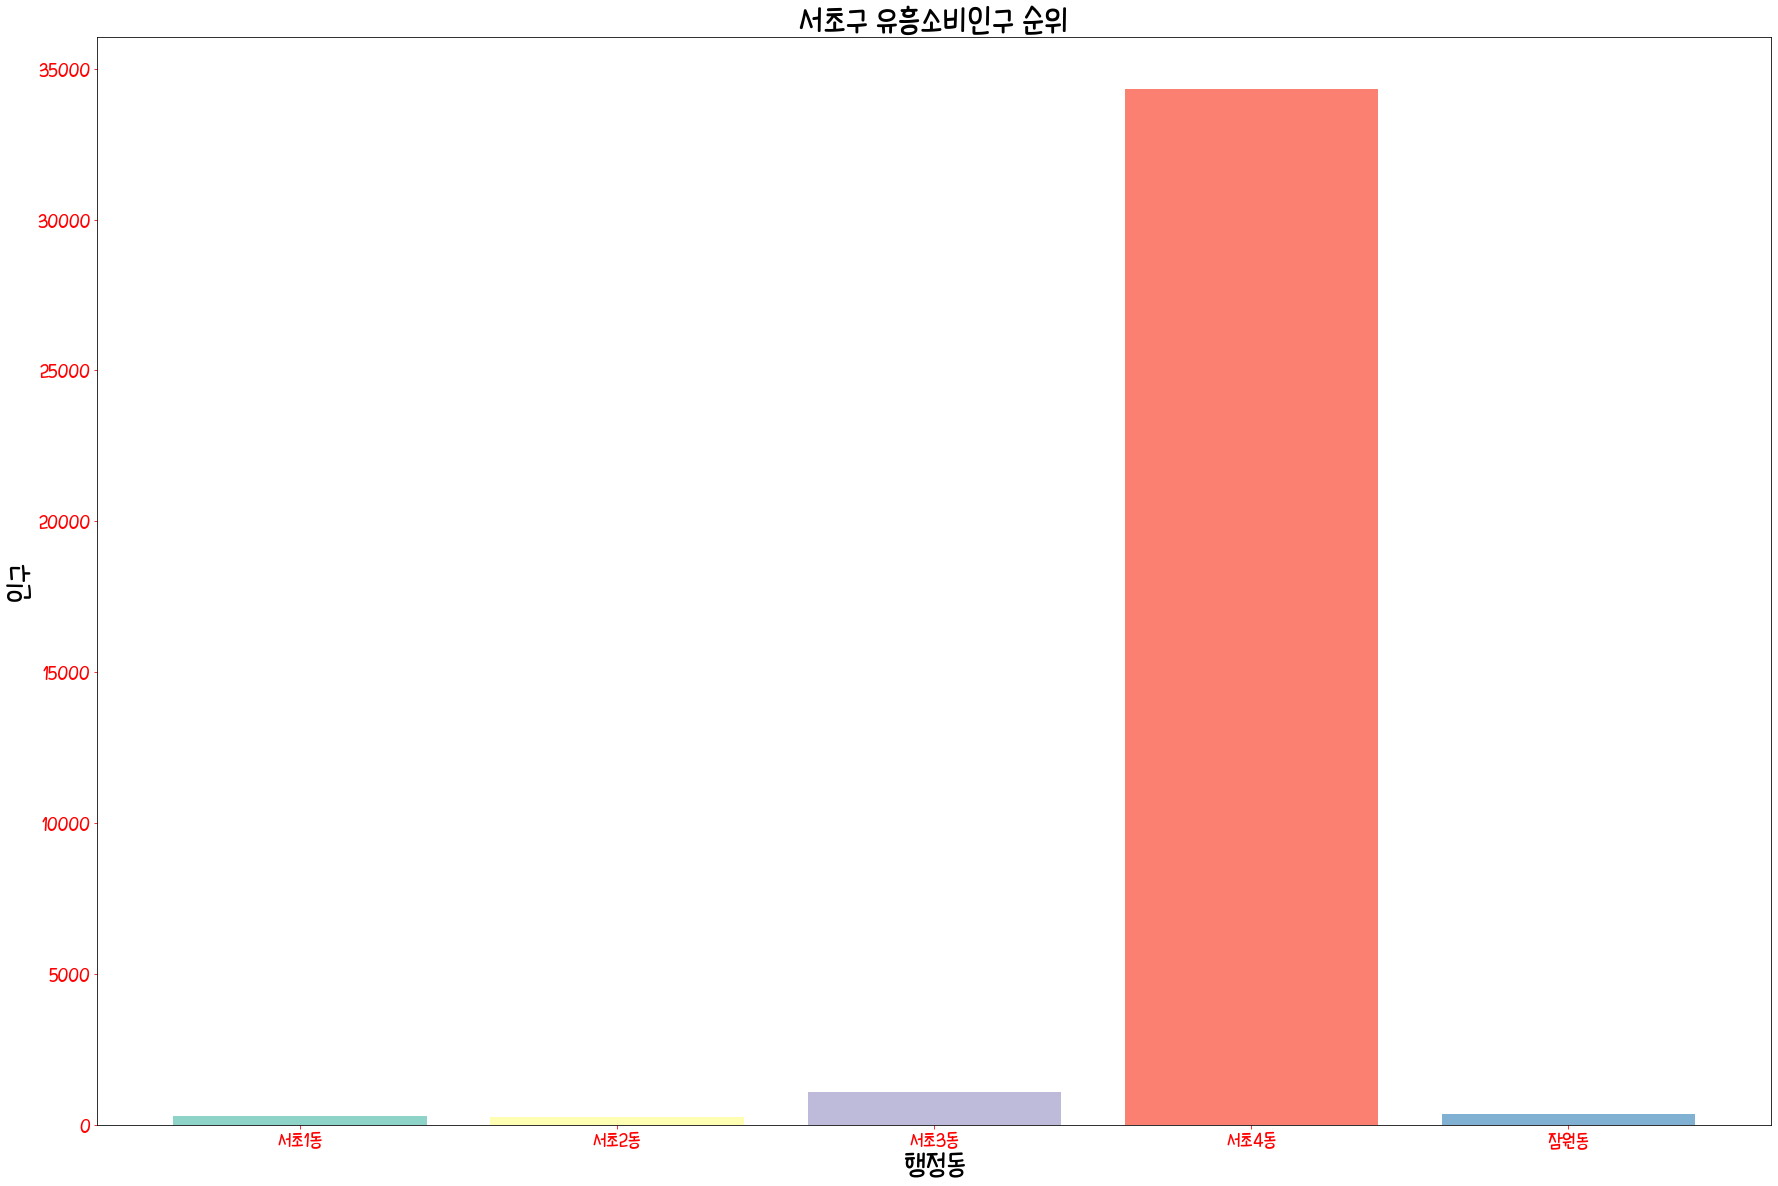

In [60]:
plt.figure(figsize=(30,20))
print(plt.gcf())
s = g

plt.title("서초구 유흥소비인구 순위",size=35)
plt.xlabel('행정동',size=30)
plt.ylabel('인구',size=30)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.bar(s.index,s.cnsmr_popltn_co, color=mycolors)

plt.xticks(fontsize =20)
plt.yticks(fontsize =20)


#plt.show()
plt.savefig('./서초구 유흥소비인구순위.png')